# RECIPES SET UP

Unsupervised Learning: Distances, Clustering and PCA

## Setup

Run the following 2 cells to import all necessary libraries and helpers for this week's exercises

In [1]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/image_utils.py

!wget -qO- https://github.com/DM-GY-9103-2024F-H/9103-utils/releases/latest/download/att-faces.tar.gz | tar xz

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import Audio
from sklearn.model_selection import train_test_split

from data_utils import PCA, RandomForestClassifier, StandardScaler
from data_utils import KMeansClustering, SpectralClustering
from data_utils import object_from_json_url, classification_error, display_confusion_matrix

from image_utils import make_image, open_image

import re

In [23]:
##json file from kaggle
recipes_path = "./data/recipes.json"
recipes_df = pd.read_json(recipes_path)

# cleaned these up in excel to remove duplicates like diced toamatoes/chopped tomatoes/ and just keep tomatoes
ingredients_list = [
    "açaí", "achiote", "acini di pepe", "almond butter", "almonds", "amaranth", 
    "anchovies", "apples", "apricots", "artichoke hearts", "avocados", "bacon", 
    "bananas", "basil", "bay leaves", "beans", "beef", "bell pepper", 
    "berry", "blackberries", "bread", "broccoli", "broth", "bulgur wheat", "butter", 
    "cabbage", "capers", "caramel", "carrots", "cashews", "catfish", "cauliflower", 
    "celery", "cereal", "cheese", "cherries", "chicken", "chickpeas", "chili", "chive", 
    "chocolate", "cilantro", "clams", "cocoa", "coconut", "cod", "corn", "cornstarch", 
    "crab", "cranberries", "cucumber", "dill", "eggplant", "eggs", "english muffins", 
    "fennel", "figs", "fish fillets", "flaxseed", "flounder", "flour", "frosting", 
    "garlic", "ginger", "gnocchi", "green beans", "halibut", "ham", "herring", "honey", 
    "hot sauce", "jalapeños", "kale", "ketchup", "kimchi", "salt", "lamb", 
    "leek", "lemon", "lettuce", "limes", "macaroni", "mackerel", "maple syrup", 
    "mayonnaise", "milk", "mushrooms", "mustard", "noodles", "oats", "olive", "olive oil", 
    "onion", "orzo", "oyster sauce", "parsley", "peanut butter", "pears", "peas", "pickles", 
    "pineapple", "pineapple juice", "pork", "potato", "pumpkin", "quinoa", "red pepper flakes", 
    "rice", "rosemary", "sage", "salmon", "salsa", "sardines", "sausage", "scallions", "scallops", 
    "seafood", "sesame oil", "sesame seeds", "shrimp", "snapper", "soy sauce", "spaghetti", "spices", 
    "spinach", "squash", "strawberry", "sugar", "sweet potatoes", "swordfish", "tahini", "tilapia", 
    "tofu", "tomato", "tortillas", "trout", "tuna", "turkey", "vinegar", "wontons", "yams", "yogurt", 
    "zucchini"
]

# clean up ingredients names
def clean_ingredient_names(ingredients):
    return [ingredient.strip().lower() for ingredient in ingredients]
for idx, row in recipes_df.iterrows():
    recipes_df.at[idx, 'ingredients'] = [ingredient.strip().lower() for ingredient in row['ingredients']]

# crate a new df with zeros
ingredient_df = pd.DataFrame(0, index=recipes_df.index, columns=ingredients_list)

#  USED CHATGPT FOR THIS PART -- Function to match a recipe's ingredients with the predefined ingredient list (partial match using regex)
def match_ingredients(recipe_idx, recipe_ingredients, ingredient_columns):
    for ingredient in recipe_ingredients:
        for column in ingredient_columns:
            # Match partial ingredient name (e.g., "swiss cheese" matches "cheese")
            if re.search(r'\b' + re.escape(ingredient) + r'\b', column):
                ingredient_df.loc[recipe_idx, column] = 1

# Iterate through the recipes and assign 1s for each ingredient present (with partial matching)
for idx, row in recipes_df.iterrows():
    for ingredient in row['ingredients']:
        match_ingredients(idx, [ingredient], ingredient_df.columns)
        print("1 assigned")


ingredient_df['id'] = recipes_df['id']
ingredient_df = ingredient_df[['id'] + [col for col in ingredient_df.columns if col != 'id']]


1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned
1 assigned

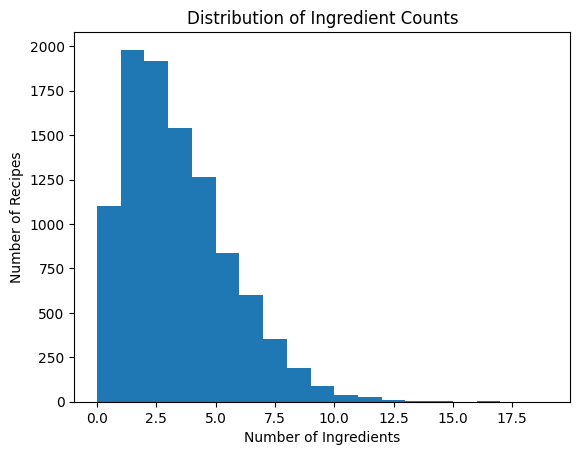

In [26]:
# Plot the distribution of ingredient counts
plt.hist(ingredient_counts, bins=range(0, 20))
plt.title('Distribution of Ingredient Counts')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.show()


SANITY CHECK -- CHATGPT

In [25]:
# Print out the column names in ingredient_df to check their formatting
print(f"Ingredient columns: {ingredient_df.columns.tolist()}")

# Check if the recipe ingredients match the ingredient_df columns in a case-insensitive way
ingredients_9513 = recipes_df.loc[recipes_df['id'] == 9513, 'ingredients'].values[0]
print(f"Ingredients for id 9513: {ingredients_9513}")

# Normalize the ingredient names to lowercase and strip whitespace for better matching
normalized_columns = [col.strip().lower() for col in ingredient_df.columns]
normalized_ingredients = [ingredient.strip().lower() for ingredient in ingredients_9513]

# Check for partial matches with normalized ingredients
missing_ingredients_partial = []
for ingredient in normalized_ingredients:
    if not any(re.search(r'\b' + re.escape(ingredient) + r'\b', column) for column in normalized_columns):
        missing_ingredients_partial.append(ingredient)

print(f"Missing ingredients (partial match) for id 9513: {missing_ingredients_partial}")

# Check for exact matches with normalized ingredients
missing_ingredients_exact = [ingredient for ingredient in normalized_ingredients if ingredient not in normalized_columns]
print(f"Missing ingredients (exact match) for id 9513: {missing_ingredients_exact}")


Ingredient columns: ['id', 'açaí', 'achiote', 'acini di pepe', 'almond butter', 'almonds', 'amaranth', 'anchovies', 'apples', 'apricots', 'artichoke hearts', 'avocados', 'bacon', 'bananas', 'basil', 'bay leaves', 'beans', 'beef', 'bell pepper', 'berry', 'blackberries', 'bread', 'broccoli', 'broth', 'bulgur wheat', 'butter', 'cabbage', 'capers', 'caramel', 'carrots', 'cashews', 'catfish', 'cauliflower', 'celery', 'cereal', 'cheese', 'cherries', 'chicken', 'chickpeas', 'chili', 'chive', 'chocolate', 'cilantro', 'clams', 'cocoa', 'coconut', 'cod', 'corn', 'cornstarch', 'crab', 'cranberries', 'cucumber', 'dill', 'eggplant', 'eggs', 'english muffins', 'fennel', 'figs', 'fish fillets', 'flaxseed', 'flounder', 'flour', 'frosting', 'garlic', 'ginger', 'gnocchi', 'green beans', 'halibut', 'ham', 'herring', 'honey', 'hot sauce', 'jalapeños', 'kale', 'ketchup', 'kimchi', 'salt', 'lamb', 'leek', 'lemon', 'lettuce', 'limes', 'macaroni', 'mackerel', 'maple syrup', 'mayonnaise', 'milk', 'mushrooms', 